In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
def first_number(error):
    error = str(error)
    if "e" in error:
        return error[0]
    else:
        error = error.strip("0.")
        return error[0]

### Acceptance rates

In [28]:
def acc_rates(a_list,lamb,start=1,size=10):
    plt.figure(figsize=(15,5))
    for a in a_list:
        df = pd.read_csv(f"./Datos/Oscillator/acc_rates/acc_l_{lamb}_a_{a}.csv")

        epsilons = df["epsilon"]
        acc_rates = df["mean"]
        stderrs = df["se"]

        plt.errorbar(epsilons,acc_rates,stderrs,marker="o",ls="-",ecolor="k",label=f"a={a}")

    plt.xlabel("Epsion")
    plt.ylabel("Acc rates")
    plt.title(f"Acceptance rates\n lambda={lamb}\n  size={size}, start={start}, samples = 1000")
    plt.xticks(np.arange(0,2.2,0.1))
    plt.grid()
    plt.legend()
    plt.show()

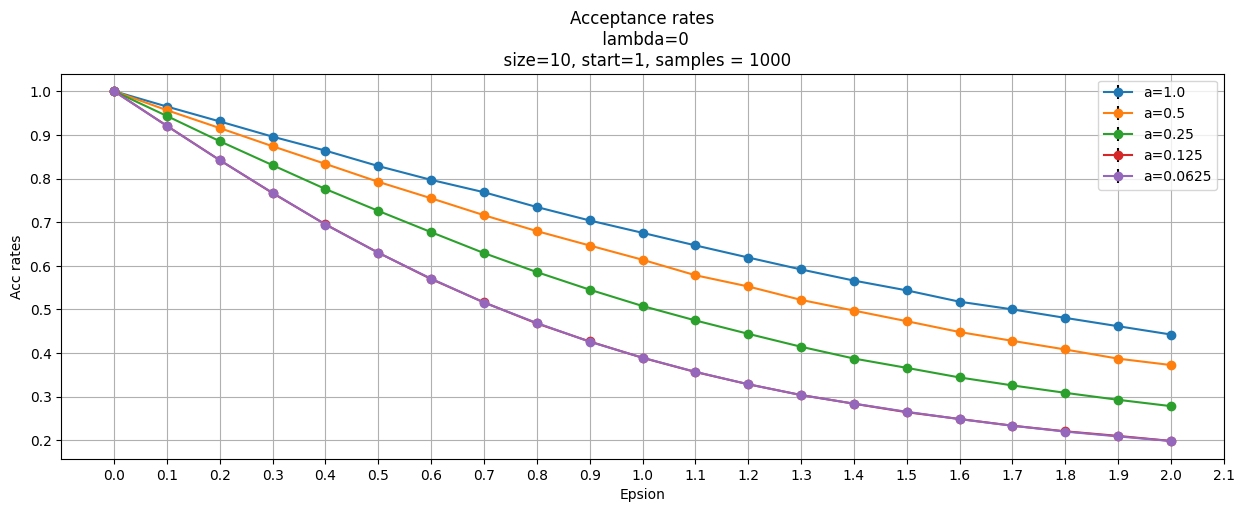

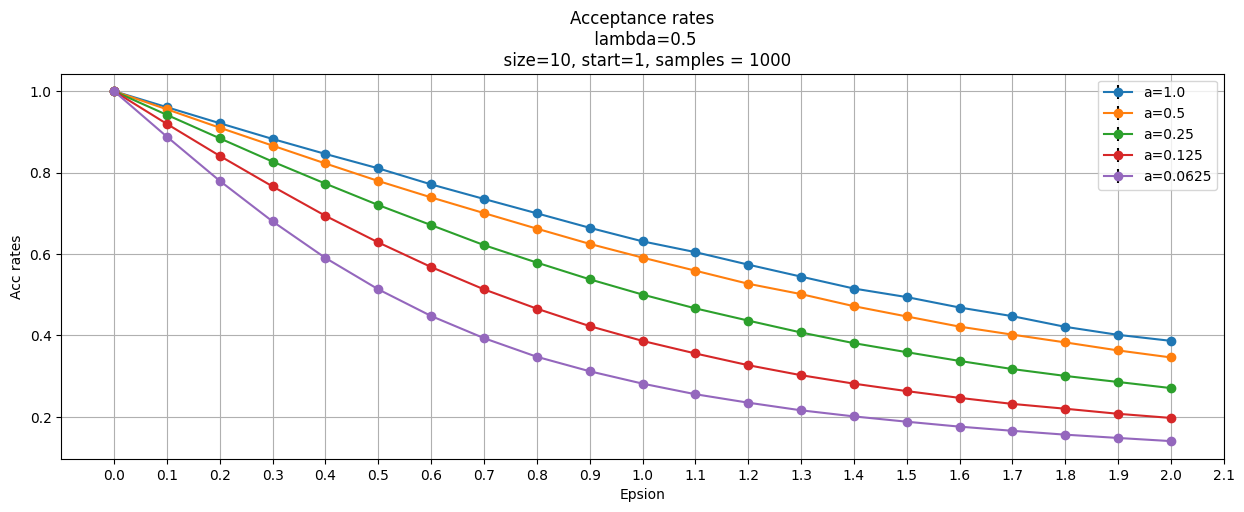

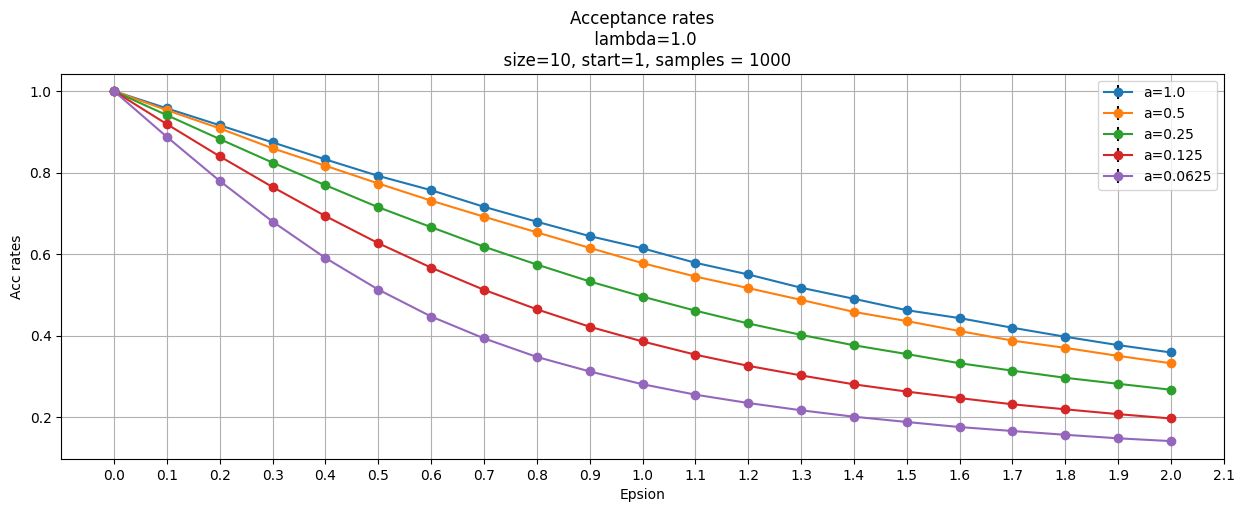

In [31]:
a_list = ["1.0","0.5","0.25","0.125","0.0625"]
acc_rates(a_list,lamb="0")
acc_rates(a_list,lamb="0.5")
acc_rates(a_list,lamb="1.0")

In [32]:
eps_dic={
    "lamb_0.0":{
        "1.0":0.6,
        "0.5":0.5,
        "0.25":0.35,
        "0.1":0.25,
        "0.05":0.25
    },
    "lamb_0.5":{
        "1.0":0.5,
        "0.5":0.45,
        "0.25":0.35,
        "0.1":0.25,
        "0.05":0.2
    },
    "lamb_1.0":{
        "1.0":0.5,
        "0.5":0.45,
        "0.25":0.35,
        "0.1":0.25,
        "0.05":0.2
    }
}

def epsilon_opt(lamb,a):
    return eps_dic[f"lamb_{str(lamb)}"][f"{str(a)}"]

In [33]:
def epsilon_opt(lamb,a):
    return eps_dic[f"lamb_{str(lamb)}"][f"{str(a)}"]

epsilon_opt(lamb=0.0,a=1.0)


0.6

### Action vs sweeps


In [9]:
def hot_cold(lamb):
    df = pd.read_csv(f"./Datos/Oscillator/SE/lambda_{lamb}.csv")
    
    y0 = df["SE_cold"]
    y1 = df["SE_hot"]

    plt.figure(figsize=(20,5))
    plt.plot(y0,marker="o",alpha=0.5,color="blue",label=f"Cold start: mean = {y0.mean():0.2f}$\pm${np.sqrt(y0.var()/len(y0)):0.2f}")
    plt.plot(y1,marker="s",alpha=0.5,color="red",label=f"Hot start: mean = {y1.mean():0.2f}$\pm${np.sqrt(y1.var()/len(y1)):0.2f}")

    plt.axhline(y0.mean(),color = "k", label = "cold mean")
    plt.axhline(y1.mean(),color = "grey", label = "hot mean")

    plt.title("S_E vs sweeps\nsweeps: 510000\ntermalization: 1000, steps: 10\na=1, measurements = 10000, λ=%s"%(lamb))

    plt.xlabel("sweeps")
    plt.xlim(1000,1100)
    plt.ylabel("$S_E$")
    plt.legend()
    plt.show()
    

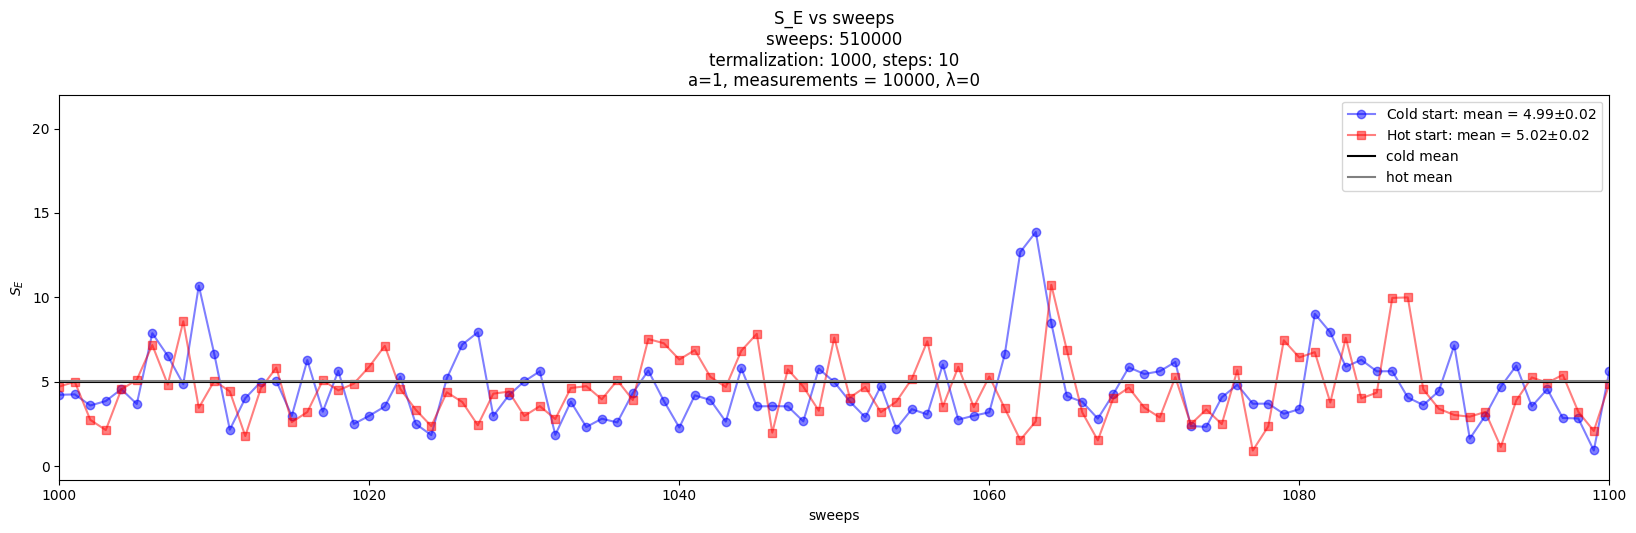

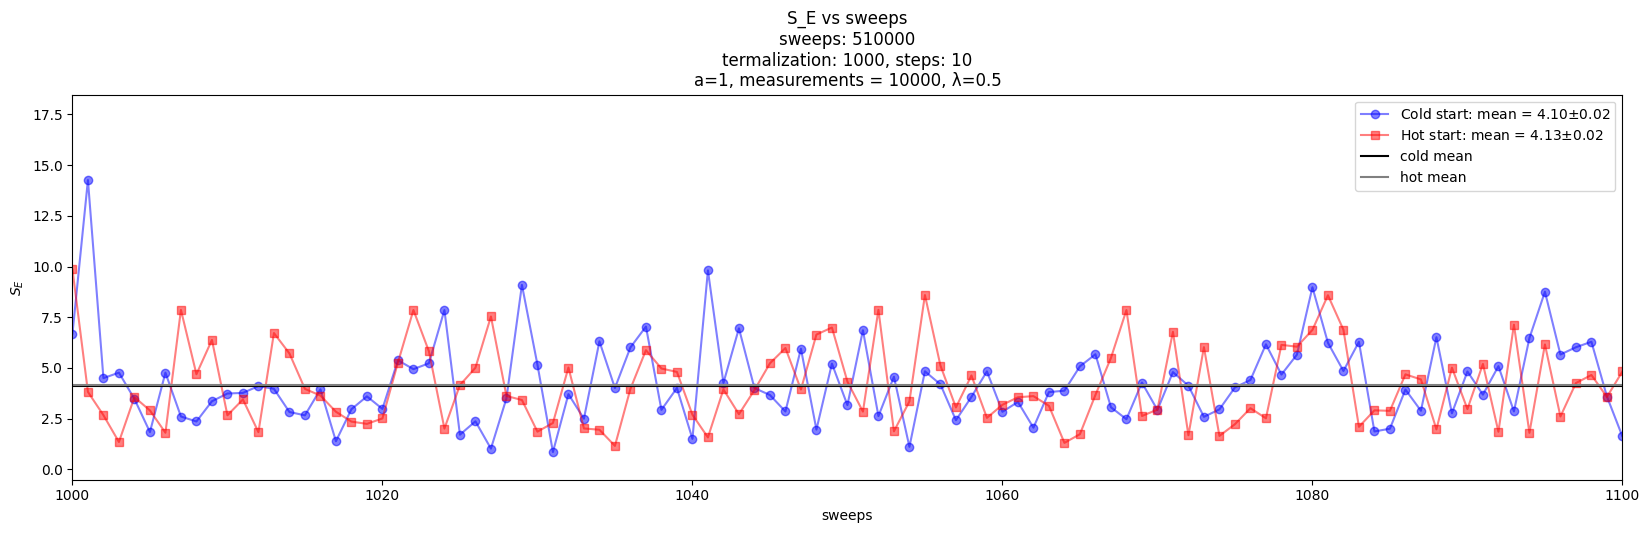

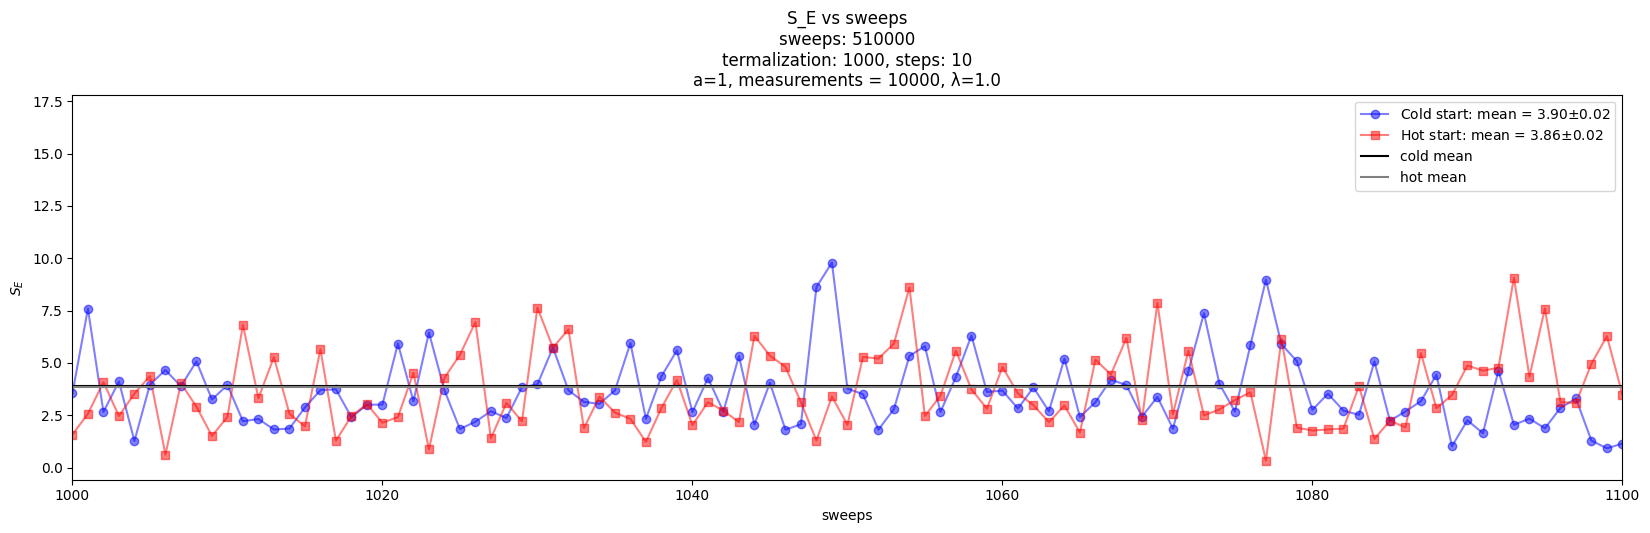

In [34]:
hot_cold(lamb="0")
hot_cold(lamb="0.5")
hot_cold(lamb="1.0")

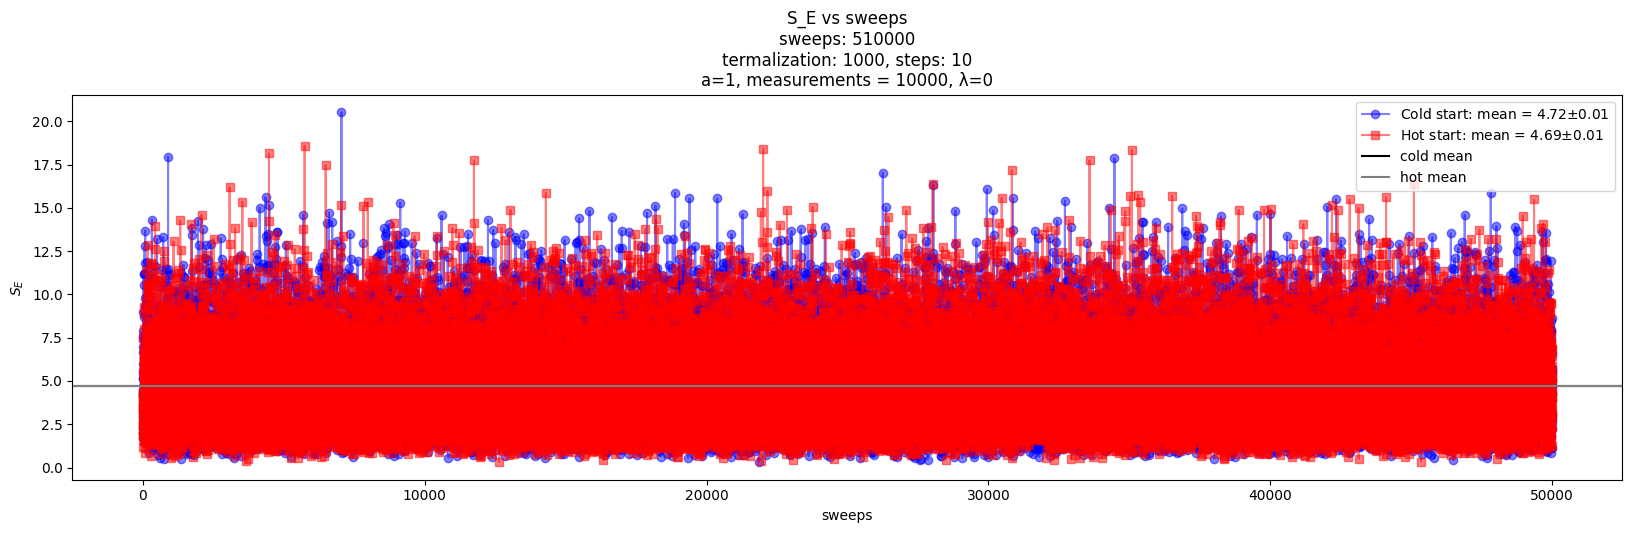

In [276]:
hot_cold(lamb="0")

#hot_cold(lamb="05")
#hot_cold(lamb="1")

In [113]:
def energy_plot(x,y,yerr,lambda_):
    def theoretical_energy(x,a,b):
        return a*x+b

    x_theo = np.lisnpace(0,1,1000)

    popt,pcov = curve_fit(theoretical_energy,x,y,sigma=yerr)

    residuals = (y - theoretical_energy(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err, b_err = np.sqrt(np.diag(pcov))
    a_err, b_err = first_number(a_err), first_number(b_err)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_energy(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"a = {popt[0]}({a_err}), b = {popt[1]}({b_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("$\Delta t$ vs $E_0$\n $\lambda$ = {lambda_}".format(lambda_))
    plt.yabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()

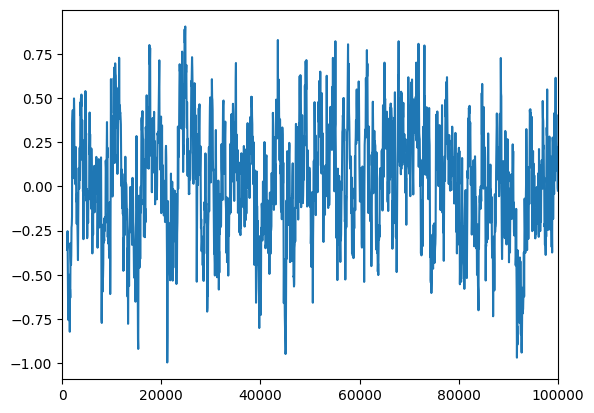

In [20]:
df = pd.read_csv("./Datos/Oscillator/tray_a_1_l_0.csv")

x = df["x0"][1000:100000:50]
plt.plot(x)
plt.xlim(0,100000)
plt.show()

In [ ]:
def corr_plot(x,y,yerr,lambda_):
    def theoretical_corr(x,a,xi):
        return a*np.cosh((x-5)/xi)

    x_theo = np.lisnpace(0,1,1000)

    popt,pcov = curve_fit(theoretical_corr,x,y,sigma=yerr)

    residuals = (y - theoretical_corr(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err, xi_err = np.sqrt(np.diag(pcov))
    a_err, xi_err = first_number(a_err), first_number(xi_err)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_corr(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"a = {popt[0]}({a_err}), $\xi$ = {popt[1]}({xi_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("$\Delta t$ vs $E_0$\n $\lambda$ = {lambda_}".format(lambda_))
    plt.yabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()